## ThinkDSP

This notebook contains code examples from Chapter 4: Noise

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
np.random.seed(17)

The simplest noise to generate is uncorrelated uniform (UU) noise:

In [4]:
from thinkdsp import UncorrelatedUniformNoise

signal = UncorrelatedUniformNoise()
wave = signal.make_wave(duration = 1, framerate = 11025)
wave.make_audio()

Here's what a segment of it looks like:

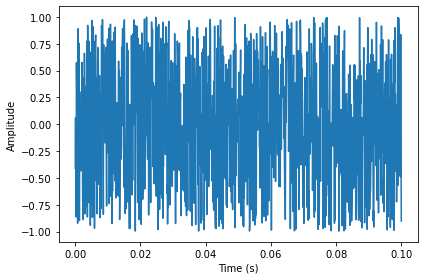

In [5]:
segment = wave.segment(duration = 0.1)
segment.plot()
decorate(xlabel = 'Time (s)', ylabel = 'Amplitude')

And here's the spectrum:

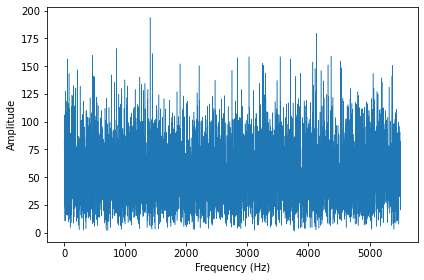

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot(linewidth = 0.5)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

In the context of noise it is more conventional to look at the spectrum of power, which is the square of amplitude:

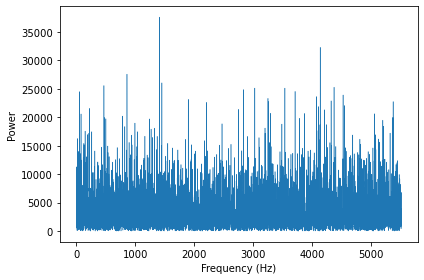

In [7]:
spectrum.plot_power(linewidth = 0.5)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power')

UU noise has the same power at all frequencies, on average, which we can confirm by looking at the normalized cumulative sum of power, which is called as integrated spectrum:

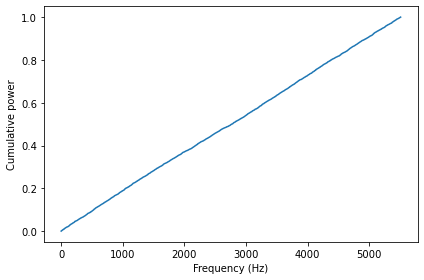

In [8]:
integ = spectrum.make_integrated_spectrum()
integ.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Cumulative power')

A straight line in this figure indicates that UU noise has equal power at all frequencies, on average.  By analogy with light, noise with this property is called "white noise".

### Brownian noise

Brownian noise is generated by adding up a sequence of random steps.

In [9]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
wave = signal.make_wave(duration = 1, framerate = 11025)
wave.make_audio()

The sound is less bright, or more muffled, than white noise.

Here's what the wave looks like:

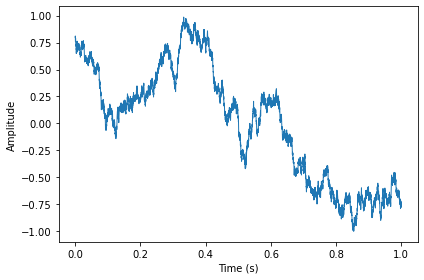

In [10]:
wave.plot(linewidth = 1)
decorate(xlabel = 'Time (s)', ylabel = 'Amplitude')

Here's what the power spectrum looks like on a linear scale.

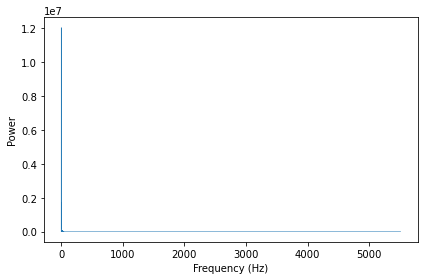

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth = 0.5)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power')

So much of the energy is at low frequencies, we can't even see the high frequencies.

We can get a better view by plotting the power spectrum on a log-log scale.

The f=0 component is very small, so on a log scale it's very negative. 
If we clobber it before plotting, we can see the rest of the spectrum more clearly.

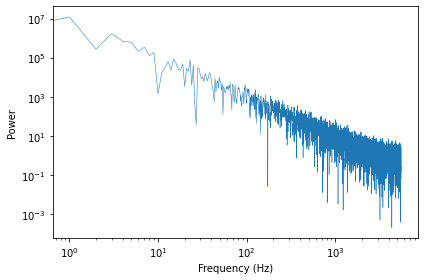

In [12]:
spectrum.hs[0] = 0
spectrum.plot_power(linewidth = 0.5)
loglog = dict(xscale = 'log', yscale = 'log')
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

Now the relationship between power and frequency is clearer. 
The slope of this line is approximately -2, which indicates that $P = K / f^2$, for some constant $K$.

In [13]:
signal = BrownianNoise()
wave = signal.make_wave(duration = 0.5, framerate = 11025)
spectrum = wave.make_spectrum()
result = spectrum.estimate_slope()
result.slope

-1.8023725700755187

The estimated slope of the line is closer to -1.8 than -2, for reasons we'll see later.

### Pink noise

Pink noise is characterized by a parameter, $\beta$, usually between 0 and 2. We can hear the differences below.

With $\beta=0$, we get white noise:

In [14]:
from thinkdsp import PinkNoise

signal = PinkNoise(beta = 0)
wave = signal.make_wave(duration = 1)
wave.make_audio()

With $\beta=1$, pink noise has the relationship $P = K / f$, which is why it is also called $1/f$ noise.

In [15]:
signal = PinkNoise(beta = 1)
wave = signal.make_wave(duration = 1)
wave.make_audio()

With $\beta=2$, we get Brownian (aka red) noise.

In [16]:
signal = PinkNoise(beta = 2)
wave = signal.make_wave(duration = 1)
wave.make_audio()

The following figure shows the power spectrums for white, pink, and red noise on a log-log scale.

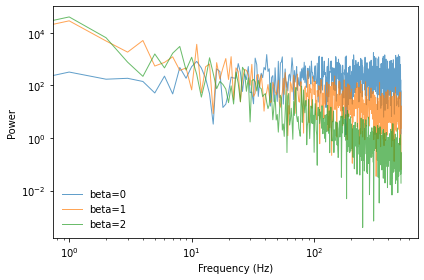

In [17]:
betas = [0, 1, 2]

for beta in betas:
    signal = PinkNoise(beta = beta)
    wave = signal.make_wave(duration = 1, framerate = 1024)
    spectrum = wave.make_spectrum()
    spectrum.hs[0] = 0
    label = f'beta={beta}'
    spectrum.plot_power(linewidth = 1, alpha = 0.7, label = label)
    
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

### Uncorrelated Gaussian noise

An alternative to UU noise is uncorrelated Gaussian (UG noise).

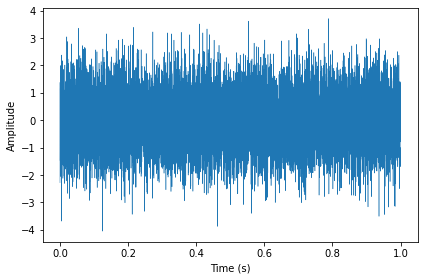

In [18]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration = 1, framerate = 11025)
wave.plot(linewidth = 0.5)
decorate(xlabel = 'Time (s)', ylabel = 'Amplitude')

The spectrum of UG noise is also UG noise.

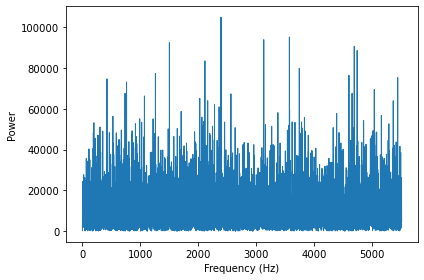

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot_power(linewidth = 1)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power')

We can use a normal probability plot to test the distribution of the power spectrum.

In [20]:
def normal_prob_plot(sample, fit_color = '0.8', **options):
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    ys = np.sort(sample)
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color = 'gray', alpha = 0.5, label = 'model')
    plt.plot(xs, ys, **options)

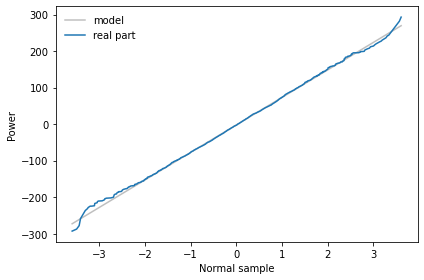

In [21]:
normal_prob_plot(spectrum.real, color = 'C0', label = 'real part')
decorate(xlabel = 'Normal sample', ylabel = 'Power')

A straight line on a normal probability plot indicates that the distribution of the real part of the spectrum is Gaussian.

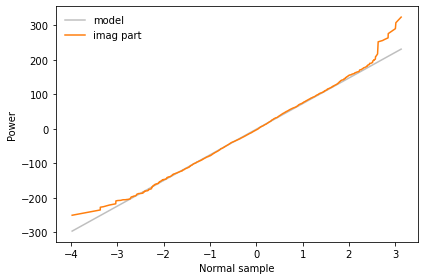

In [22]:
normal_prob_plot(spectrum.imag, color = 'C1', label = 'imag part')
decorate(xlabel = 'Normal sample', ylabel = 'Power')

And so is the imaginary part.

## Exercise 1

``A Soft Murmur`` is a web site that plays a mixture of natural
noise sources, including rain, waves, wind, etc.
Download a few of these files and compute the spectrum of each signal.
Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

In [25]:
if not os.path.exists('fire.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/132736__ciccarelli__ocean-waves.wav

In [28]:
from thinkdsp import read_wave

wave = read_wave('fire.wav')
wave.make_audio()

We chose a recording of ocean waves and selected a short segment:

In [29]:
segment = wave.segment(start = 1.0, duration = 1.0)
segment.make_audio()

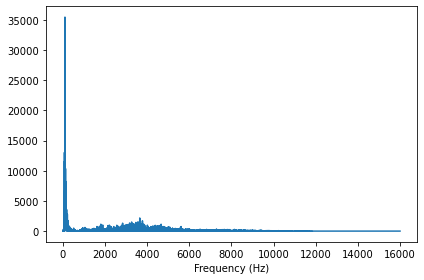

In [30]:
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel = 'Frequency (Hz)')

Amplitude drops off with frequency, so this might be red or pink noise. We can check by looking at the power spectrum on a log-log scale.

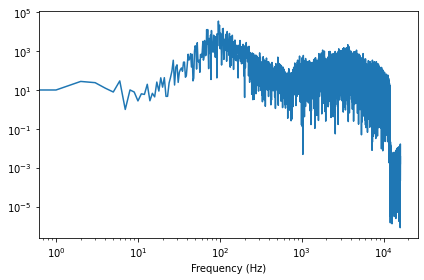

In [31]:
spectrum.plot_power()
loglog = dict(xscale = 'log', yscale = 'log')
decorate(xlabel = 'Frequency (Hz)', **loglog)

This structure, with increasing and then decreasing amplitude, seems to be common in natural noise sources.
Above $f = 10^3$, it might be dropping off linearly, but we can't really tell.
To see how the spectrum changes over time, we'll select another segment:

In [32]:
segment2 = wave.segment(start = 2.5, duration = 1.0)
segment2.make_audio()

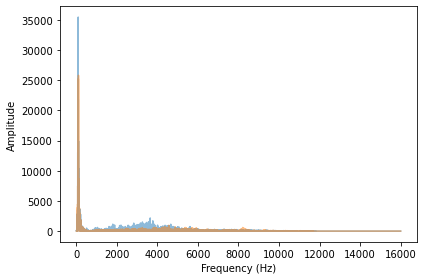

In [33]:
spectrum2 = segment2.make_spectrum()
spectrum.plot_power(alpha = 0.5)
spectrum2.plot_power(alpha = 0.5)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude')

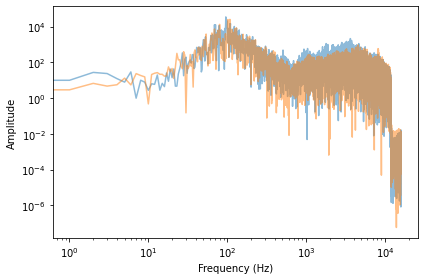

In [34]:
spectrum.plot_power(alpha = 0.5)
spectrum2.plot_power(alpha = 0.5)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Amplitude', **loglog)

So the structure seems to be consistent over time.
We can also look at a spectrogram:

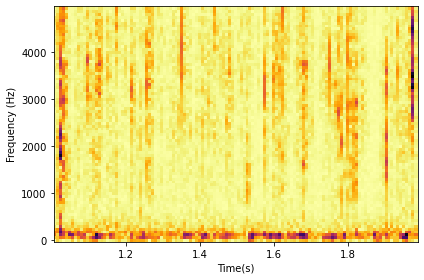

In [35]:
segment.make_spectrogram(512).plot(high = 5000)
decorate(xlabel = 'Time(s)', ylabel = 'Frequency (Hz)')

Within this segment, the overall amplitude drops off, but the mixture of frequencies seems consistent.

### Exercise 2:
In a noise signal, the mixture of frequencies changes over time.
In the long run, we expect the power at all frequencies to be equal, but in any sample, the power at each frequency is random.

To estimate the long-term average power at each frequency, we can break a long signal into segments, compute the power spectrum for each segment, and then compute the average across the segments.
Implement Bartlett's method and use it to estimate the power spectrum for a noise wave.

In [32]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length = 512, win_flag = True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    psds = [spectrum.power for spectrum in spectrums]
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

`bartlett_method` makes a spectrogram and extracts `spec_map`, which maps from times to Spectrum objects. It computes the PSD for each spectrum, adds them up, and puts the results into a Spectrum object.

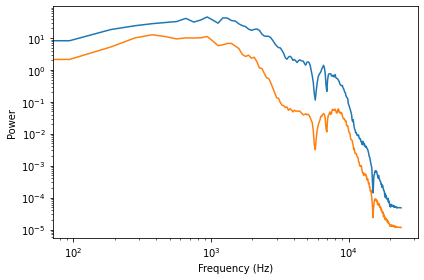

In [33]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)
psd.plot_power()
psd2.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

Now we can see the relationship between power and frequency more clearly. It is not a simple linear relationship, but it is consistent across different segments, even in details like the notches near 5000 Hz, 6000 Hz, and above 10,000 Hz.

## Exercise 3

We can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

In [34]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

In [35]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


In [36]:
ys = df['Closing Price (USD)']
ts = df.index

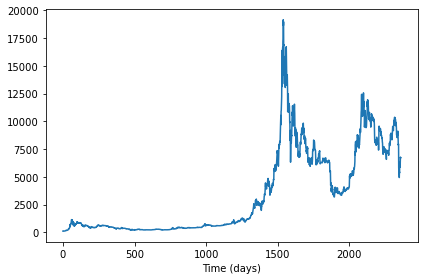

In [37]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate = 1)
wave.plot()
decorate(xlabel = 'Time (days)')

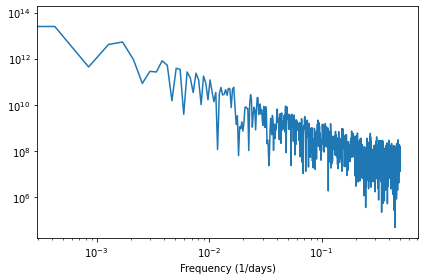

In [38]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel = 'Frequency (1/days)', **loglog)

In [39]:
spectrum.estimate_slope()[0]

-1.733254093675893

Red noise should have a slope of -2. The slope of this PSD is close to 1.7, so it's hard to say if we should consider it red noise or if we should say it's a kind of pink noise.

## Exercise 4

A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.

Write a class called `UncorrelatedPoissonNoise` that inherits from ` _Noise` and provides `evaluate`. It should use `np.random.poisson` to generate random values from a Poisson distribution. The parameter of this function, `lam`, is the average number of particles during each interval. You can use the attribute `amp` to specify `lam`. For example, if the framerate is 10 kHz and `amp` is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of `amp`, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise. 

In [40]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

Here's what it sounds like at low levels of "radiation".

In [41]:
amp = 0.001
framerate = 10000
duration = 2
signal = UncorrelatedPoissonNoise(amp = amp)
wave = signal.make_wave(duration = duration, framerate = framerate)
wave.make_audio()

To check that things worked, we compare the expected number of particles and the actual number:

In [42]:
expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

20.0 22


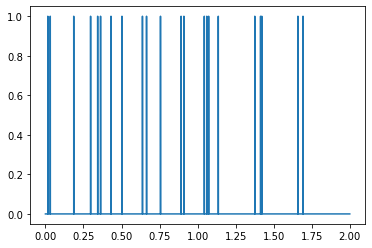

In [43]:
wave.plot()

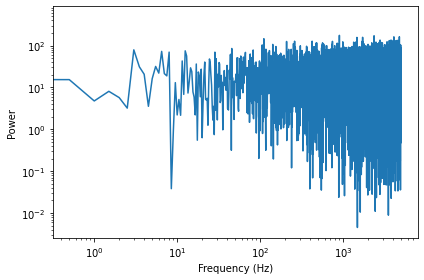

In [44]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', **loglog)

Looks like white noise, and the slope is close to 0:

In [45]:
spectrum.estimate_slope().slope

0.01261632653611954

With a higher arrival rate, it sounds more like white noise:

In [46]:
amp = 1
framerate = 10000
duration = 2
signal = UncorrelatedPoissonNoise(amp = amp)
wave = signal.make_wave(duration = duration, framerate = framerate)
wave.make_audio()

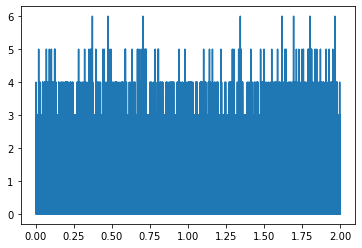

In [47]:
wave.plot()

And the spectrum converges on Gaussian noise.

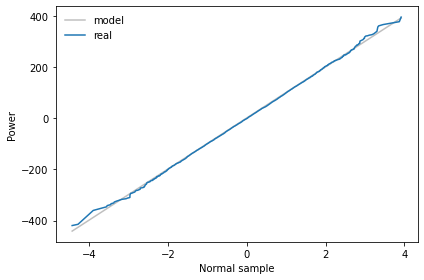

In [49]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
normal_prob_plot(spectrum.real, label = 'real')
decorate(xlabel = 'Normal sample', ylabel = 'Power')

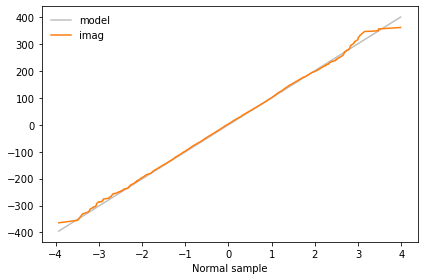

In [50]:
normal_prob_plot(spectrum.imag, label = 'imag', color = 'C1')
decorate(xlabel = 'Normal sample')

## Exercise 5

The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. 
There are more efficient alternatives, like the Voss-McCartney algorithm.
Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.

The fundamental idea of this algorithm is to add up several sequences of random numbers that get updates at different sampling rates. The first source should get updated at every time step; the second source every other time step, the third source ever fourth step, and so on.
In the original algorithm, the updates are evenly spaced. In an alternative, they are randomly spaced.
Implementation starts with an array with one row per timestep and one column for each of the white noise sources. Initially, the first row and the first column are random and the rest of the array is NaN.

In [51]:
nrows = 100
ncols = 5
array = np.empty((nrows, ncols))
array.fill(np.nan)
array[0, :] = np.random.random(ncols)
array[:, 0] = np.random.random(nrows)
array[0:6]

array([[3.90974690e-01, 1.62083754e-01, 7.36228427e-01, 2.84397594e-01,
        4.64156277e-01],
       [8.69697702e-01,            nan,            nan,            nan,
                   nan],
       [5.31583500e-01,            nan,            nan,            nan,
                   nan],
       [8.91300910e-01,            nan,            nan,            nan,
                   nan],
       [6.08564909e-04,            nan,            nan,            nan,
                   nan],
       [6.09125765e-01,            nan,            nan,            nan,
                   nan]])

The next step is to choose the locations where the random sources change.  If the number of rows is $n$, the number of changes in the first column is $n$, the number in the second column is $n/2$ on average, the number in the third column is $n/4$ on average, etc.
So the total number of changes in the matrix is $2n$ on average; since $n$ of those are in the first column, the other $n$ are in the rest of the matrix.
To place the remaining $n$ changes, we generate random columns from a geometric distribution with $p=0.5$.  If we generate a value out of bounds, we set it to 0 (so the first column gets the extras).

In [52]:
p = 0.5
n = nrows
cols = np.random.geometric(p, n)
cols[cols >= ncols] = 0
cols

array([1, 2, 3, 2, 1, 1, 3, 2, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2,
       2, 2, 1, 1, 2, 1, 3, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 4, 1,
       3, 1, 1, 2, 1, 2, 1, 1, 2, 4, 3, 1, 1, 4, 2, 1, 1, 1, 0, 4, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2,
       3, 2, 1, 1, 2, 3, 0, 2, 2, 1, 1, 1])

Within each column, we choose a random row from a uniform distribution. Ideally we would choose without replacement, but it is faster and easier to choose with replacement.

In [53]:
rows = np.random.randint(nrows, size = n)
rows

array([88, 36, 27, 43, 36, 93, 63,  5, 76, 14, 13, 34, 35, 71, 39, 79, 34,
       10, 40, 70, 15, 96, 48, 17,  8,  4, 65,  1, 49, 42, 26, 47, 51, 13,
        8, 12, 34, 48,  3, 98, 27, 73, 27, 48, 55, 75, 88, 44, 19, 61, 64,
       75, 93, 73, 13, 53,  4, 67, 65, 56, 50, 48, 48,  6, 78, 60, 28, 53,
       68, 93, 91, 87, 34, 63, 88,  4, 92, 95, 19, 64, 87, 35,  4, 48, 28,
       93, 28, 93, 34, 91, 63, 46, 35, 28, 80, 18, 69, 46, 30, 55])

Now we can put random values at rach of the change points.

In [54]:
array[rows, cols] = np.random.random(n)
array[0:6]

array([[0.39097469, 0.16208375, 0.73622843, 0.28439759, 0.46415628],
       [0.8696977 , 0.11308907,        nan,        nan,        nan],
       [0.5315835 ,        nan,        nan,        nan,        nan],
       [0.89130091, 0.17855556,        nan,        nan,        nan],
       [0.86855171, 0.41863635,        nan,        nan,        nan],
       [0.60912576,        nan, 0.02988959,        nan,        nan]])

Next we want to do a zero-order hold to fill in the NaNs. NumPy doesn't do that, but Pandas does. So I'll create a DataFrame:

In [55]:
df = pd.DataFrame(array)
df.head()

,0,1,2,3,4
0,0.390975,0.162084,0.736228,0.284398,0.464156
1,0.869698,0.113089,NaN,NaN,NaN
2,0.531583,NaN,NaN,NaN,NaN
3,0.891301,0.178556,NaN,NaN,NaN
4,0.868552,0.418636,NaN,NaN,NaN


And then use fillna along the columns.

In [56]:
filled = df.fillna(method = 'ffill', axis = 0)
filled.head()

,0,1,2,3,4
0,0.390975,0.162084,0.736228,0.284398,0.464156
1,0.869698,0.113089,0.736228,0.284398,0.464156
2,0.531583,0.113089,0.736228,0.284398,0.464156
3,0.891301,0.178556,0.736228,0.284398,0.464156
4,0.868552,0.418636,0.736228,0.284398,0.464156


Finally we add up the rows.

In [57]:
total = filled.sum(axis = 1)
total.head()

0    2.037841
1    2.467569
2    2.129455
3    2.554639
4    2.771970
dtype: float64

If we put the results into a Wave, here's what it looks like:

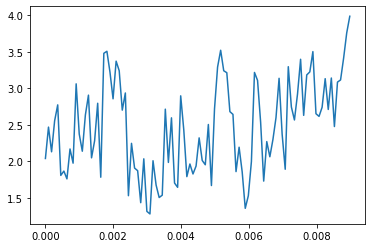

In [58]:
wave = Wave(total.values)
wave.plot()

Here's the whole process in a function:

In [59]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size = n)
    array[rows, cols] = np.random.random(n)
    df = pd.DataFrame(array)
    df.fillna(method = 'ffill', axis = 0, inplace = True)
    total = df.sum(axis = 1)
    return total.values

In [60]:
ys = voss(12500)
ys

array([6.75181753, 6.88818781, 6.1841821 , ..., 8.88852305, 9.2423556 ,
       9.36934236])

In [61]:
wave = Wave(ys)
wave.unbias()
wave.normalize()

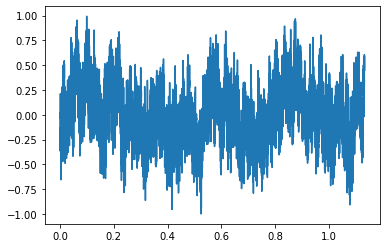

In [62]:
wave.plot()

As expected, it is more random-walk-like than white noise, but more random looking than red noise.

In [63]:
wave.make_audio()

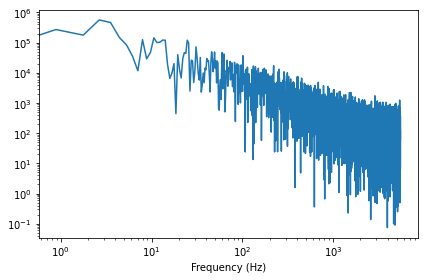

In [64]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel = 'Frequency (Hz)', **loglog)

The estimated slope is close to -1:

In [65]:
spectrum.estimate_slope().slope

-1.0324804870624378

We can get a better sense of the average power spectrum by generating a longer sample:

In [66]:
seg_length = 64 * 1024
iters = 100
wave = Wave(voss(seg_length * iters))
len(wave)

6553600

And using Barlett's method to compute the average.

In [67]:
spectrum = bartlett_method(wave, seg_length = seg_length, win_flag = False)
spectrum.hs[0] = 0
len(spectrum)

32769

It's pretty close to a straight line, with some curvature at the highest frequencies.

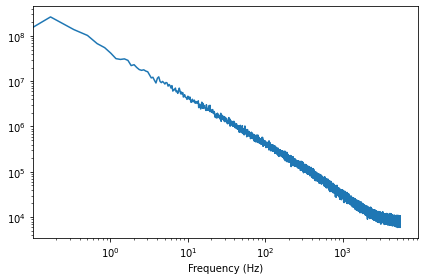

In [68]:
spectrum.plot_power()
decorate(xlabel = 'Frequency (Hz)', **loglog)

And the slope is close to -1:

In [69]:
spectrum.estimate_slope().slope

-1.0019701846792457